# Contribution à l'optimisation des tournées pour l’entretien des arbres de la ville de Paris
## OpenClassRooms
## Suan Tay - 04 juillet 2020
<img src="https://drive.google.com/uc?id=1VkeQ1v3faPXy-1pBWOovlDNIg21NwKrx" alt="Data Paris" style="width: 600px;"/>


## Projet 2 : Smart City
> Dans le cadre du challenge Data sponsorisé par la ville de Paris.  
> je dois aider Paris à devenir une *smart-city* .  
> Je dois effectuer une analyse des données sur les *arbres* de Paris.  
L'analyse se déroulera en 3 phases :
1. Présentation générale du jeu de données
2. Démarche méthodologique d’analyse de données 
3. Synthèse de l’analyse de données

## Environnement virtuel  
  
> Environnement utiliser : *p2smartcity*
 ![image](https://drive.google.com/uc?id=1k0XrIPui99h-smuGSReRHnVWKKyTkrxB)

## Importation des librairies python spécialisées et csv

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('p2-arbres-fr.csv', sep=';')

# 1. Présentation générale du jeu de données

## Brève description du jeu de données

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

## Calcule des indicateurs statistiques basiques (moyenne et écart-type)  pour les différentes colonnes

#### Nombre de colonnes et de lignes

In [3]:
print('Nombres de lignes : %s , nombres de colonnes : %s' % df.shape)

Nombres de lignes : 200137 , nombres de colonnes : 18


### Statistiques basiques :

In [4]:
df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


#### Enumération des colonnes

In [5]:
df.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

#### Type de chaque colonne :

In [ ]:
df.dtypes

## Comparaison de l'ordre de grandeur des grandeurs statistiques des différentes colonnes

In [6]:
df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [7]:
print('La valeur maximum de la hauteur d\'un arbre est trop grande : %s (m).' % max(df.hauteur_m))
print('Ainsi que la valeur du maximum de la circonference : %s (cm).' % max(df.circonference_cm))

La valeur maximum de la hauteur d'un arbre est trop grande : 881818 (m).
Ainsi que la valeur du maximum de la circonference : 250255 (cm).


# 2. Démarche méthodologique d’analyse de données

##  Données manquantes :

In [ ]:
df.isnull().any()
# False n'a pas de null
# True à des null
# A traiter 
df.columns[df.isnull().any()]

##  Dénombrons les données manquantes :

In [8]:
df.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [9]:
print('Nombres de lignes : %s, nombres de colonnes : %s.' % df.shape)

Nombres de lignes : 200137, nombres de colonnes : 18.


### Suppression des données manquantes

In [10]:
df.dropna(subset=['libelle_francais','espece','domanialite','genre'],inplace=True)

In [11]:
print('Nombres de lignes : %s, nombres de colonnes : %s.' % df.shape)

Nombres de lignes : 197252, nombres de colonnes : 18.


### Supprimons de doublons

In [12]:
df.drop_duplicates(keep=False, inplace=True)

In [13]:
print('Nombres de lignes : %s, nombres de colonnes : %s.' % df.shape)

Nombres de lignes : 197252, nombres de colonnes : 18.


### Valeurs aberrantes avec la règle 1,5 écart interquartile
> L’écart interquartile est une mesure de dispersion qui s'obtient en faisant la différence entre le troisième et le premier quartile :  
> **EI = Q₃ - Q₁**.  
> L'EI est un estimateur statistique robuste.  
>  Une valeur est dite aberrante  
>  si elle est inférieure à  **Q₁ - 1,5 x EI**  
>  et  
>  si elle est supérieure à **Q₃ + 1,5 x EI**.

In [14]:
def remove_outliers(df, column):
    '''IQR
    Cette fonction calcule l'IQR- interquartile range
    Parameters
    ----------
    df : dataframe 
    column : colonne
        Supprime les valeurs aberrantes selon l'IQR.
    Returns
    -------
    df
        df (True/False) avec les valeurs qui sont dans IQR
    '''
    # Calcul Q1, Q2 et IQR
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3 - Q1
    #outliers limits
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    # mask
    mask = (df[column] >= lower) & (df[column] <= upper)
    return mask

In [15]:
print("Nombre d'enregistrement initial                     : %s \nNombre de colonnes : %s " % df.shape)
#hauteur
df=df[remove_outliers(df,'hauteur_m')]
print("Nombre d'enregistrement après IQR sur la hauteur    : %s \nNombre de colonnes : %s " % df.shape)
#circonference
df=df[remove_outliers(df,'circonference_cm')]
print("Nombre d'enregistrement après IQR sur circonference : %s \nNombre de colonnes : %s " % df.shape)

Nombre d'enregistrement initial                     : 197252 
Nombre de colonnes : 18 
Nombre d'enregistrement après IQR sur la hauteur    : 193361 
Nombre de colonnes : 18 
Nombre d'enregistrement après IQR sur circonference : 190426 
Nombre de colonnes : 18 


Les données ont été nettoyées :
1. Suppression des données vides
2. Suppression des doublons
3. Suppression des valeurs aberrantes

# 3. Synthèse de l'analyse de données

# Analyse univariée 

## Variable discrète

> Les variables discrètes sont des variables numériques ayant des valeurs dénombrables entre deux valeurs. 
> Une variable discrète est toujours numérique. Par exemple, le nombre de plaintes de clients ou le nombre de défauts.

## Hauteur

[Text(0, 0.5, "Nombre d'arbres"), Text(0.5, 0, 'Hauteur des arbres (m)')]

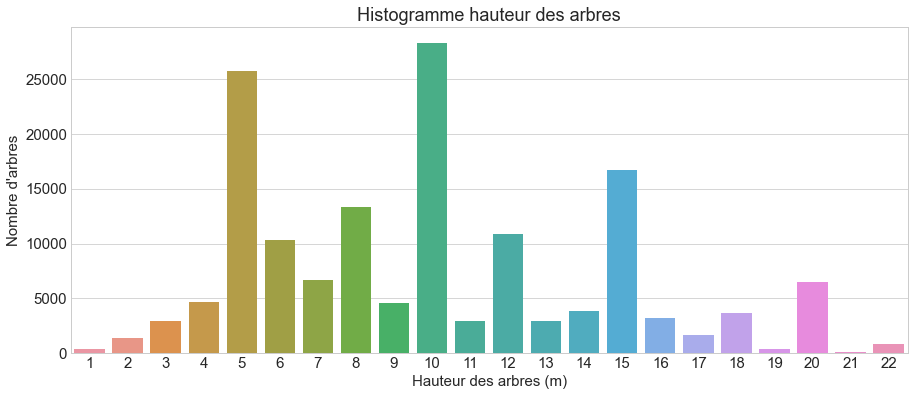

In [16]:
#avec seaborn
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({ 'font.size' : 15})
fig,ax=plt.subplots(1,1, figsize = (15,6))
plt.title("Histogramme hauteur des arbres")
sns.countplot( x='hauteur_m', data=df[df.hauteur_m>0])
ax.set( ylabel="Nombre d'arbres",xlabel="Hauteur des arbres (m)")

## Circonférence 

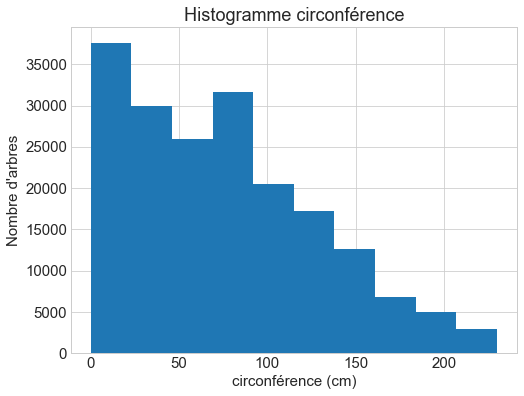

In [17]:
# avec Matplotlib
plt.subplots(1,1, figsize = (8,6))

#l'histogramme sans bins
df.circonference_cm.hist()
#titre du tableau
plt.title("Histogramme circonférence",fontsize=18)
plt.xlabel("circonférence (cm)",fontsize=15)
plt.ylabel("Nombre d'arbres",fontsize=15)
plt.show()

## Type d'emplacement 

Text(0, 0.5, "Nombre d'arbres")

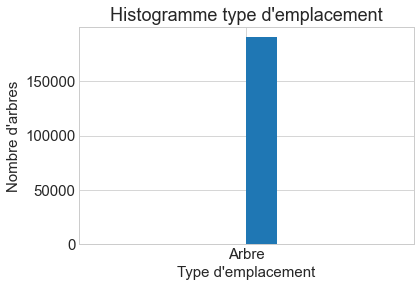

In [18]:
#l'histogramme 
df.type_emplacement.hist()
#titre du tableau
plt.title("Histogramme type d'emplacement",fontsize=18)
plt.xlabel("Type d'emplacement",size=15)
plt.ylabel("Nombre d'arbres",size=15)

## Variable de catégorie

> Les variables de catégorie ont un nombre fini de catégories ou de groupes distincts. Les données de catégorie peuvent ne pas présenter d'ordre logique. 
> Par exemple, les prédicteurs de catégorie incluent le sexe d'individus, le type de matériel et le mode de paiement.

## Domanialité

In [19]:
df[['domanialite']].groupby('domanialite')['domanialite'].count().sort_values(ascending=False)

domanialite
Alignement      100526
Jardin           43480
CIMETIERE        29992
DASCO             6297
PERIPHERIQUE      5247
DJS               3569
DFPE              1291
DAC                 20
DASES                4
Name: domanialite, dtype: int64

[Text(0, 0.5, 'Domanialité par type'), Text(0.5, 0, "Nombre d'arbres")]

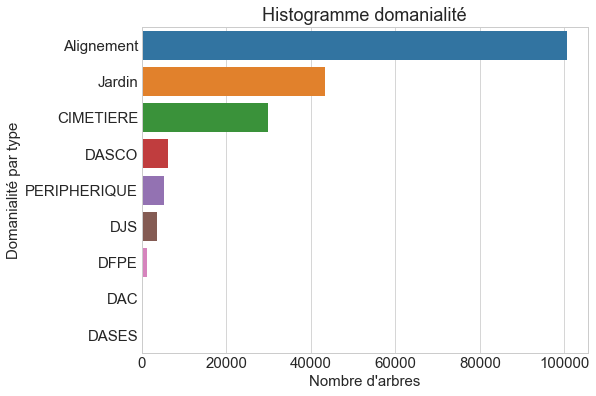

In [20]:
plt.style.use('seaborn-whitegrid')
fig,ax=plt.subplots(1,1, figsize = (8,6))
plt.title("Histogramme domanialité", size=18)
sns.countplot( y='domanialite', data=df,order = df['domanialite'].value_counts().index)
ax.set( xlabel="Nombre d'arbres",ylabel="Domanialité par type")

## Arrondissement

In [21]:
df[['arrondissement']].groupby('arrondissement')['arrondissement'].count().sort_values(ascending=False)

arrondissement
PARIS 15E ARRDT      16726
PARIS 13E ARRDT      15998
PARIS 16E ARRDT      15602
PARIS 20E ARRDT      14710
PARIS 19E ARRDT      12811
PARIS 12E ARRDT      12046
SEINE-SAINT-DENIS    11150
PARIS 14E ARRDT      10810
BOIS DE VINCENNES    10780
PARIS 17E ARRDT      10460
PARIS 18E ARRDT       9637
PARIS 7E ARRDT        8154
PARIS 8E ARRDT        6836
VAL-DE-MARNE          6551
PARIS 11E ARRDT       5512
HAUTS-DE-SEINE        5284
BOIS DE BOULOGNE      3877
PARIS 10E ARRDT       2829
PARIS 4E ARRDT        2600
PARIS 5E ARRDT        2196
PARIS 6E ARRDT        1675
PARIS 1ER ARRDT       1339
PARIS 3E ARRDT        1171
PARIS 9E ARRDT        1143
PARIS 2E ARRDT         529
Name: arrondissement, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

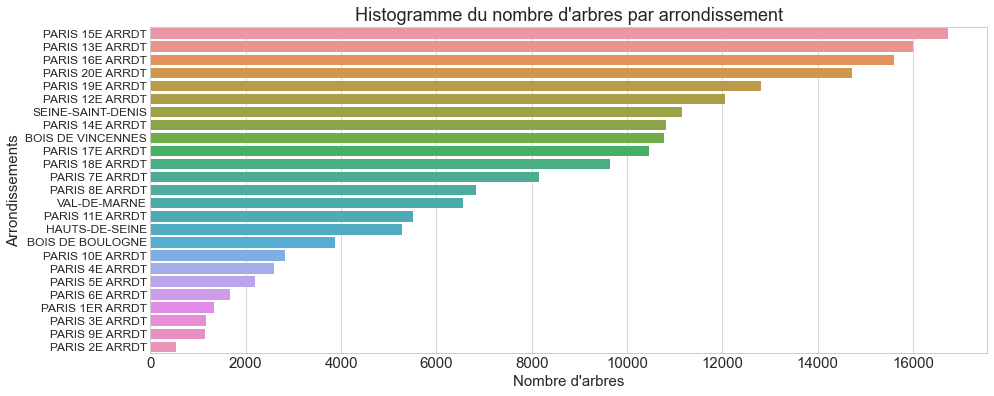

In [22]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( y='arrondissement', data=df, order = df['arrondissement'].value_counts().index)
plt.title("Histogramme du nombre d'arbres par arrondissement")
ax.set( xlabel="Nombre d'arbres",ylabel="Arrondissements")
plt.yticks(size=12)

### Notion de classement botanique

![image](https://drive.google.com/uc?id=1w4TAftKPc7nc1LJ9LhPWH7dgYJEp4iQ9)

## Espèce

In [23]:
df[['espece','id']].groupby(['espece']).agg(['count'])

,id
,count
espece,
Fleur n. sp.,15
Fruit n. sp.,9
abies,112
acalycina,2
acerifolius,1
...,...
x yedoensis,15
x zoeschense,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

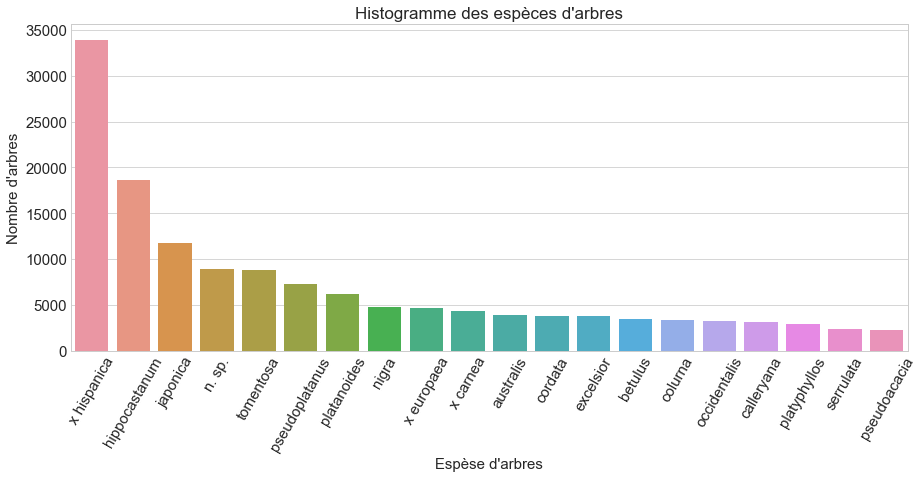

In [24]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="espece", 
              data=df,
              order = df["espece"].value_counts().iloc[:20].index)
plt.title("Histogramme des espèces d'arbres", size=17)
ax.set( xlabel="Espèse d'arbres",ylabel="Nombre d'arbres")
plt.yticks(size=15)
plt.xticks(rotation=60,size=15)

### Variété

In [25]:
df[['variete','id']].groupby(['variete']).agg(['count'])

,id
,count
variete,
Aberdoniae',25
Afghanica',2
Aglandau',1
Akane',3
Alaska',1
...,...
Yellow Bird',3
Youngii',34


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

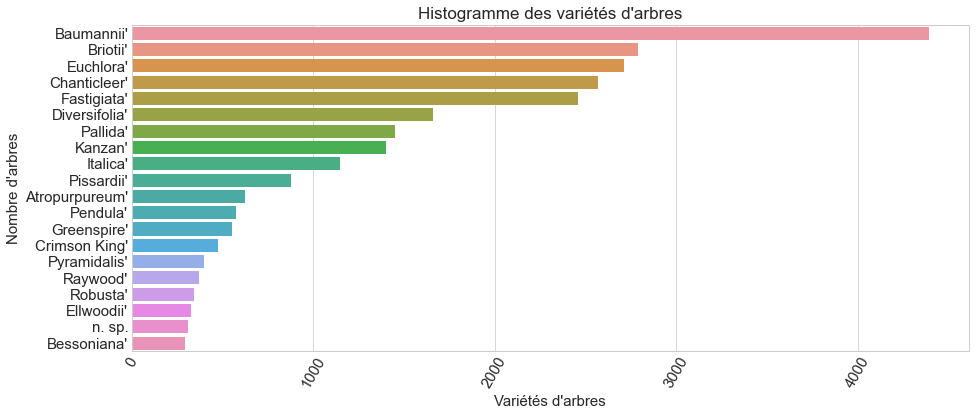

In [26]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( y="variete", 
              data=df,
              order = df["variete"].value_counts().iloc[:20].index)
plt.title("Histogramme des variétés d'arbres", size=17)
ax.set( xlabel="Variétés d'arbres",ylabel="Nombre d'arbres")
plt.yticks(size=15)
plt.xticks(rotation=60,size=15)

## Genre

In [27]:
df[['genre','id']].groupby(['genre']).agg(['count']).head()

,id
,count
genre,
Abelia,2
Abies,119
Acacia,9
Acca,1
Acer,18151


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

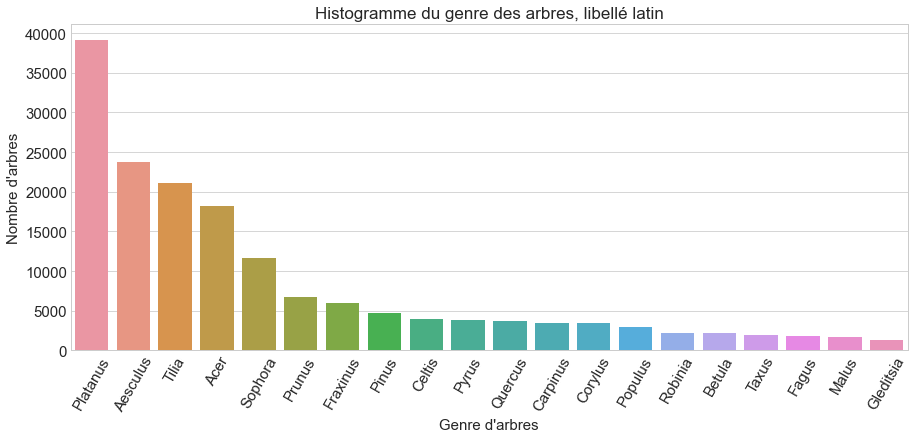

In [28]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="genre", 
              data=df,
              order = df["genre"].value_counts().iloc[:20].index)
plt.title("Histogramme du genre des arbres, libellé latin", size=17)
ax.set( xlabel="Genre d'arbres",ylabel="Nombre d'arbres")
plt.yticks(size=15)
plt.xticks(rotation=60,size=15)

## Libellé des arbres en français

In [29]:
df[['libelle_francais','id']].groupby(['libelle_francais']).agg(['count'])

,id
,count
libelle_francais,
Abelia,2
Abricotier,35
Ailante,928
Alangium,3
Alisier,246
...,...
Tsuga,8
Tulipier,1112


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

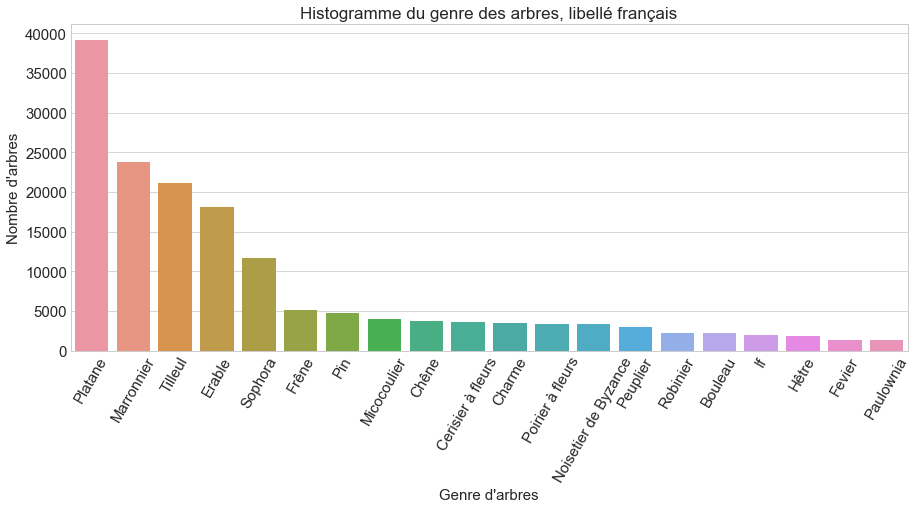

In [30]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="libelle_francais", 
              data=df,
              order = df["libelle_francais"].value_counts().iloc[:20].index)
plt.title("Histogramme du genre des arbres, libellé français", size=17)
ax.set( xlabel="Genre d'arbres",ylabel="Nombre d'arbres")
plt.yticks(size=15)
plt.xticks(rotation=60,size=15)

## Exemples d'analyse bivariée 

[Text(0, 0.5, 'Circonférence (cm)'), Text(0.5, 0, 'Hauteur des arbres (m)')]

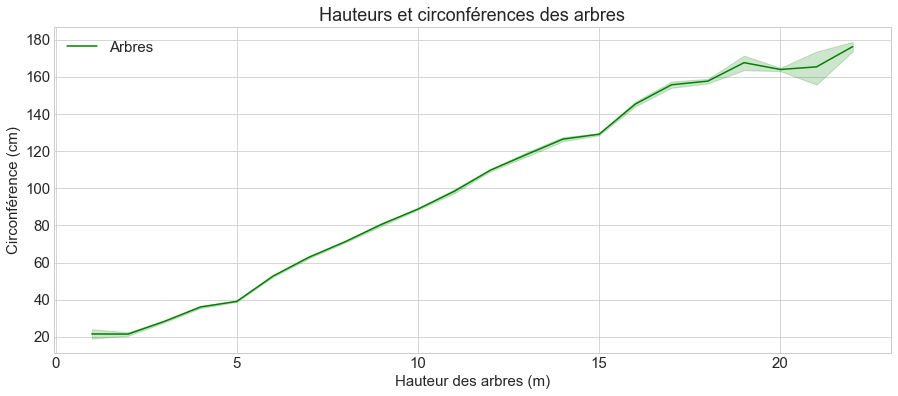

In [31]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({ 'font.size' : 15})
fig,ax=plt.subplots(1,1, figsize = (15,6))
plt.title('Hauteurs et circonférences des arbres',size=18)
sns.lineplot( x='hauteur_m',y='circonference_cm', data=df[df.hauteur_m>0], label = 'Arbres'
             ,err_style="band", color='green',legend="full")
ax.set( xlabel="Hauteur des arbres (m)",ylabel="Circonférence (cm)")

### Boîte à Moustache


> Une *boîte à moustaches* montre la répartition des données quantitatives d'une manière qui facilite la comparaison entre les variables. 
> Elle permet de représenter la médiane, les quartiles et 
>les données aberrantes (outliers).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

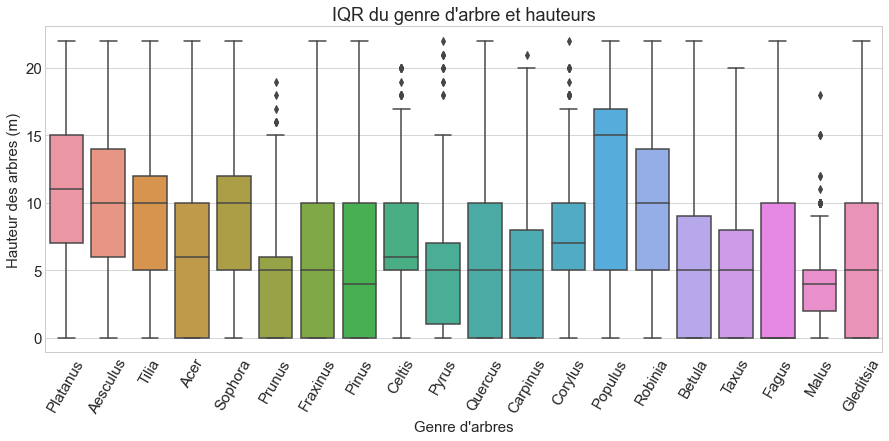

In [32]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
fig=sns.boxplot(y= 'hauteur_m', x= 'genre' , data = df,order = df["genre"].value_counts().iloc[:20].index)
plt.title("IQR du genre d'arbre et hauteurs", size=18)
ax.set( xlabel="Genre d'arbres",ylabel="Hauteur des arbres (m)")
plt.yticks(size=15)
plt.xticks(rotation=60,size=15)

# Conclusion :
>    Nous pouvons affiner la suppression des données aberrantes en utilisant la méthode IQR pour les features combinées de genres et de hauteurs.

# Merci de votre écoute  
  
  
  




> # Avez-vous des Questions ?